# MLOps-Zoomcamp Homework 1

Based on [these questions](https://github.com/DataTalksClub/mlops-zoomcamp/blob/main/01-intro/homework.md).

In [127]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

## Q1. Downloading the data

In [128]:
data_url_1 = "https://nyc-tlc.s3.amazonaws.com/trip+data/fhv_tripdata_2021-01.parquet"
data_url_2 = "https://nyc-tlc.s3.amazonaws.com/trip+data/fhv_tripdata_2021-02.parquet"

In [129]:
jan_data = pd.read_parquet(data_url_1)
feb_data = pd.read_parquet(data_url_1)

In [130]:
print(f"There are {jan_data.shape[0]} records in the January dataset!")

There are 1154112 records in the January dataset!


In [131]:
jan_data.dtypes

dispatching_base_num              object
pickup_datetime           datetime64[ns]
dropOff_datetime          datetime64[ns]
PUlocationID                     float64
DOlocationID                     float64
SR_Flag                           object
Affiliated_base_number            object
dtype: object

## Q2. Computing duration

In [132]:
jan_data['duration'] = jan_data['dropOff_datetime'] - jan_data['pickup_datetime']
jan_data['duration'] = jan_data['duration'].apply(lambda x: x.total_seconds() / 60)

In [133]:
print(f"The average trip duration in January is {round(jan_data['duration'].mean(), 2)} minutes!")

The average trip duration in January is 19.17 minutes!


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


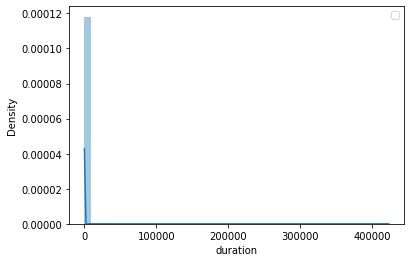

In [134]:
# Duration columns distribution

sns.distplot(jan_data['duration'])
plt.legend()

In [135]:
jan_data = jan_data[(jan_data['duration'] >= 1) & (jan_data['duration'] <= 60)]

In [136]:
jan_data.shape

(1109826, 8)

In [137]:
print(f'{1154112 - jan_data.shape[0]} records where dropped')

44286 records where dropped


## Q3. Missing values

In [138]:
jan_data['PUlocationID'].isnull().sum(), jan_data['DOlocationID'].isnull().sum()

(927008, 147907)

In [139]:
jan_data[['PUlocationID', 'DOlocationID']] = jan_data[['PUlocationID', 'DOlocationID']].fillna(value=-1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [140]:
jan_data['PUlocationID'].isnull().sum(), jan_data['DOlocationID'].isnull().sum()

(0, 0)

In [141]:
pu_na_count = jan_data[['PUlocationID']].value_counts()[-1]

In [142]:
print(f'The fractions of missing values for the pickup location ID is {round((pu_na_count / jan_data.shape[0]) * 100)}%')

The fractions of missing values for the pickup location ID is 84%


## Q4. One-hot encoding

In [143]:
categorical = ['PUlocationID', 'DOlocationID']

jan_data[categorical] = jan_data[categorical].astype(str)
jan_dicts = jan_data[categorical].to_dict(orient='records')

dv = DictVectorizer()
X_train = dv.fit_transform(jan_dicts)

In [144]:
print(f'The dimensionality of the matrix is {len(dv.feature_names_)}!')

The dimensionality of the matrix is 525!


## Q5. Training a model

In [145]:
target = 'duration'
y_train = jan_data[target].values

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

rmse_score = mean_squared_error(y_train, y_pred, squared=False)

print(f'The RMSE score is {round(rmse_score, 2)}!')

The RMSE score is 10.53!


## Q6. Evaluating the model

In [146]:
def data_preprocessing(url_path):
  ''' A function that gets the data and preprocess it.

      Args :
        - url_path : a URL that refers to parquet data 
                     from  https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page.
      
      Returns:
        A dataframe.
  '''

  # Get the data from the URL
  df = pd.read_parquet(url_path)

  # Add a new column
  df['duration'] = df['dropOff_datetime'] - df['pickup_datetime']
  df['duration'] = df['duration'].apply(lambda x: x.total_seconds() / 60)

  # Filter this new column based on conditions
  df = df[(df['duration'] >= 1) & (df['duration'] <= 60)]

  # Fill NA values 
  df[['PUlocationID', 'DOlocationID']] = df[['PUlocationID', 'DOlocationID']].fillna(value=-1)

  # Change the type of some columns
  categorical = ['PUlocationID', 'DOlocationID']
  df[categorical] = df[categorical].astype(str)

  return df

In [147]:
feb_data = data_preprocessing(data_url_2)

categorical = ['PUlocationID', 'DOlocationID']
feb_dicts = feb_data[categorical].to_dict(orient='records')

X_valid = dv.transform(feb_dicts)

In [148]:
len(dv.feature_names_)

525

In [149]:
target = 'duration'
y_valid = feb_data[target].values

y_pred = lr.predict(X_valid)

rmse_score = mean_squared_error(y_valid, y_pred, squared=False)

print(f'The RMSE score of the validation dataset is {round(rmse_score, 2)}!')

The RMSE score of the validation dataset is 11.01!
